# Part 3: Plotting Random Forests and Extra Tree Models

In [98]:
import os
import os.path as op
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.datasets import make_classification
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import HalvingGridSearchCV

from dtreeviz.trees import dtreeviz
import graphviz as gv
from dtreeviz.classifiers import clfviz

In [5]:
# main resources for the visualizations in this notebook:

# https://towardsdatascience.com/4-ways-to-visualize-individual-decision-trees-in-a-random-forest-7a9beda1d1b7
# https://github.com/parrt/dtreeviz

## Load the data and pickled models

In [20]:
# load the full, imputed dataframe
with open('data/samples_imputed.pkl', 'rb') as f:
    samples_imputed = pickle.load(f)

In [19]:
# load the random forest model
with open('models/rf2_class_model.pkl', 'rb') as f:
    rf = pickle.load(f)

In [22]:
# set X and y
X = samples_imputed.drop(columns=['is_cancer'])
y = samples_imputed['is_cancer']

# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Plot different estimators from the random fores model

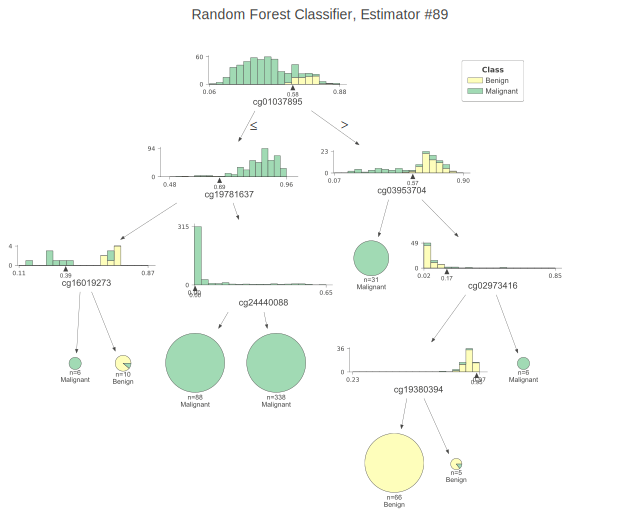

In [15]:
# using graphviz
viz = dtreeviz(rf.estimators_[89],
               X_train, 
               y_train,
               target_name="Class",
               feature_names=list(X.columns),
               class_names=['Benign', 'Malignant'],
               title="Random Forest Classifier, Estimator #89"
)
viz.save("images/decision_tree.svg")
viz

In [16]:
#open the viz plot in a browser and save it as png:
viz.view()

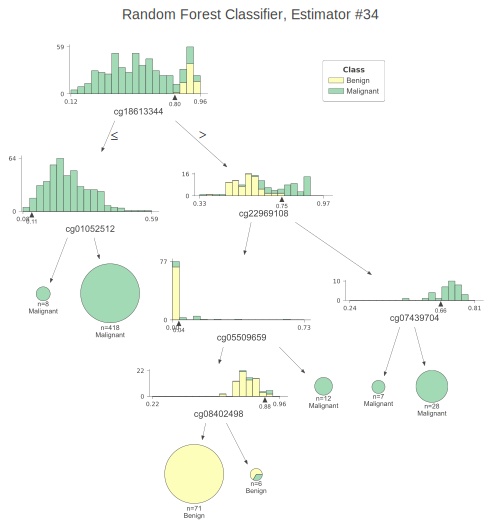

In [17]:
# plot another random forest estimator:
# using graphviz
viz2 = dtreeviz(rf.estimators_[34],
               X_train, 
               y_train,
               target_name="Class",
               feature_names=list(X.columns),
               class_names=['Benign', 'Malignant'],
               title="Random Forest Classifier, Estimator #34"
)
viz2.save("images/rf_estimator_34.svg")
viz2

In [18]:
#open the viz2 plot in a browser and save it as png:
viz2.view()

In [99]:
# Try to get features importance out of the data set including only samples with the highest variance in methylation patterns:

In [100]:
# Import the data set
with open('data/highest_variace_samples.pkl', 'rb') as f:
    highest_variace_samples = pickle.load(f)

In [102]:
# Make a small dataframe out os random 100 samples (to see if the code works)
random_100 = highest_variace_samples.sample(100)

In [103]:
# set X and y
X = random_100.drop(columns=['is_cancer'])
y = random_100['is_cancer']

# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [104]:
# make a random forest model on the highest_variace_samples dataset:
rf_high_var = RandomForestClassifier(n_estimators=100,
                            max_depth=None,
                            max_features='auto',
                            min_samples_leaf=4,
                            bootstrap=True,
                            n_jobs=-1,
                            random_state=0,
                            class_weight='balanced' 
)

# fitting
rf_high_var.fit(X_train, y_train)

# score the rf model
rf_high_var.score(X_train, y_train), rf_high_var.score(X_test, y_test)

(1.0, 0.96)

In [105]:
# inspect features importance:
#sorted(rf_high_var.feature_importances_, reverse=True)

Text(0.5, 0, 'Relative Importance')

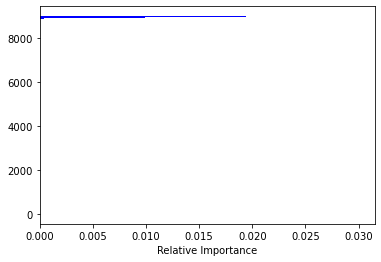

In [106]:
# try to plot features importances out of a random sample of 100 cases

features = X_train
importances = rf_high_var.feature_importances_
indices = np.argsort(importances)

# plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
#plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
# plt.show()

In [97]:
# Zoom-in: plot the distribution of class based on two features appear in the first nodes of estimator 34 and estimator 89:

C:\Users\Marva\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Marva\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


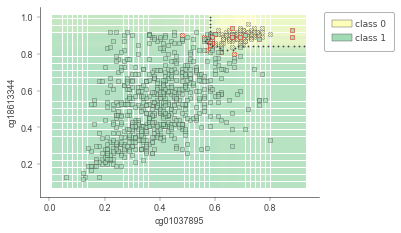

In [94]:
X = samples_imputed[['cg01037895', 'cg18613344']]
y = samples_imputed['is_cancer']

rf = RandomForestClassifier(n_estimators=30, min_samples_leaf=5, n_jobs=-1)
rf.fit(X, y)

figsize = (10, 10)

clfviz(rf,
       X.values,
       y,              
       markers=['X','s'],
       feature_names=['cg01037895', 'cg18613344'],
       dot_w=20)

